# EgFwD | Professional Data Analysis Track

# Project : Investigate "No Show Appointments" Dataset

Dataset Link : https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv

# "Now Show Appointments" Dataset Description
This dataset collects information from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment. A number of characteristics about the patient are
included in each row.

   #### 'ScheduledDay' :-
   what day the patient set up their appointment.
   #### 'Neighborhood' :-
   indicates the location of the hospital.
   #### 'Scholarship' :-
   indicates whether or not the patient is enrolled in Brasilian welfare.
   #### 'Last Column' :-
   'Yes' means patient didn't show up , 'No' means patient showed up.


## Data Analysis Process :-

### Asking Questions :-
1- what is the relationship between **"Showing Up or not"** and patients' characters like **"Age" , "Gender", ... etc.** ?

2- is there a relationship between **"Neighborhood"** of the hospital and patient **"Showing up or Not"** ?

3- Which patients are **likely not to show up related to their diseases** ?

------------------

------------------

### Data Wrangling :-

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

**Gathering Data**

In [2]:
# import "no_show_appointments" dataset in a pandas DataFrame 
# make Index Column to be "AppointmentID" Column

df = pd.read_csv('no_show_appointments.csv', index_col='AppointmentID')

##### Assesing Data

In [3]:
# Show first 5 records of dataset
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5642503,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
5642549,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
5642828,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5642494,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Dimensions of Dataset 

df.shape

(110527, 13)

Our **Dataset** consists of **13 Columns** and **110527 Record**

In [5]:
# DataType of each column.

df.dtypes

PatientId         float64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

**Note :-** "Object" type indicated that the column type is **String** 

Let's take a look at **columns and records in details** and see if we have **Null values**

In [6]:
# columns and records in details and Null values

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 5642903 to 5629448
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   Gender          110527 non-null  object 
 2   ScheduledDay    110527 non-null  object 
 3   AppointmentDay  110527 non-null  object 
 4   Age             110527 non-null  int64  
 5   Neighbourhood   110527 non-null  object 
 6   Scholarship     110527 non-null  int64  
 7   Hipertension    110527 non-null  int64  
 8   Diabetes        110527 non-null  int64  
 9   Alcoholism      110527 non-null  int64  
 10  Handcap         110527 non-null  int64  
 11  SMS_received    110527 non-null  int64  
 12  No-show         110527 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 11.8+ MB


As we see, Their is **NO Null Values**.

Let's see **Unique Values of each column** to understand our dataset better. 

In [7]:
# see number of unique values at each column

df.nunique()

PatientId          62299
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
df.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


##### Cleaning Data
We have one error to be cleaned. the minimum value of 'Age' column is -1. this value is not correct of course.

In [9]:
# number of records with Age < 1
df[df['Age'] < 0].shape

(1, 13)

there is only One Record with this error. I prefer to delete it.

In [10]:
df.drop(df[df['Age'] < 0].index, inplace= True)
df[df['Age'] < 0].shape

(0, 13)

In [11]:
df.shape

(110526, 13)

Now, Our Dataset consists of **13 Columns and 110526 Record** (instead of 110527)

### EDA (Exploring Data and Augmenting)

In this section, I will add a new feature to the dataset which is **'Days_BA'** which stands for **Days before the Appointment Day** and indicates how many days are **between the Scheduled Day and Appointment Day**. this feature will be used to find a relationship between the **"difference between scheduled day and Appointment Day"** and patient **"showing up or not"**.

Let's see our dataset again

In [12]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5642503,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
5642549,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
5642828,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5642494,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


To calculate the difference in days between Scheduled Day and Appointment Day, we need to **convert the two columns datatypes to be DateTime datatype**.

In [13]:
# convert the 'ScheduledDay' & 'AppointmentDay'  datatypes to be DateTime datatype.
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [14]:
# Recheck datatypes of columns

df.dtypes

PatientId                     float64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

As we see, the two columns are now DateTime. 

Now Let's **add 'Days_BA' column and calculate its values** based on 'AppointmentDay' & 'ScheduledDay' values.

In [15]:
# add 'Days_BA' column and calculate its values based on 'AppointmentDay' & 'ScheduledDay' values

df['Days_BA'] = df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date

In [16]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Days_BA
AppointmentID,,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
5642503,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
5642549,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
5642828,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
5642494,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


In [17]:
df.dtypes

PatientId                     float64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
Days_BA               timedelta64[ns]
dtype: object

The 'Days_BA' column is added, but the **column type is timedelta64 (not integer)**. so Let's convert it into Integer.

In [18]:
df['Days_BA'] = df['Days_BA'].dt.days

In [19]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Days_BA
AppointmentID,,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
5642503,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
5642549,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
5642828,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
5642494,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [20]:
df.dtypes

PatientId                     float64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
Days_BA                         int64
dtype: object

-------------------------------------------------------------------------------------------------------------------------------

In this section, I will add another feature which is **'Has_disease'**. this will indicate if the patient has any illness or not based on **Hypertension - Diabetes - Alcoholism - Handcap** columns. if any of these columns has a true value then the 'Has_Disease' column will have value between 1 and 4 depending on how many disease the patient has. if no diseases, then it will have value 0

In [21]:
df['Has_disease'] = df['Hipertension'] + df['Diabetes'] + df['Alcoholism'] + df['Handcap']

In [22]:
df.head(10)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Days_BA,Has_disease
AppointmentID,,,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1
5642503,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0
5642549,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0
5642828,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0
5642494,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,2
5626772,9.598513e+13,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,2,1
5630279,7.336882e+14,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2,0
5630575,3.449833e+12,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2,0
5638447,5.639473e+13,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,0,0


--------------------------------------------------------------------------------------------------------------------------------------------------------------

------------

### Exploring Data

##### Importing Matplotlib 

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

##### Histograms & Statistics for Numerical Variables

#### 1- Age

Text(0.5, 0, 'Ages')

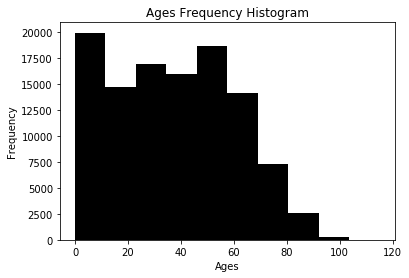

In [24]:
# Histogram for 'Age' Variable and add x-axis label

df['Age'].plot(kind = 'hist', color = 'black', title = 'Ages Frequency Histogram');

plt.xlabel("Ages")

In [25]:
# Statistics for 'Age' Variable

df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

**Mean of Ages** = 37 years

**Min. of Ages** = 0 years "this may seems not correct. but the column datatype is integer, this means that the value of any record with Age less than 1 year will be 0"

**Max. of Ages** = 115 years

**75% of records** have 55 years old or younger, and **25% of records** have 18 years old or younger.

Th Distribution of Ages is **Right-Skewed**

#### 2- Days between Scheduled Day and Appointment Day

Text(0.5, 0, 'No. of Days')

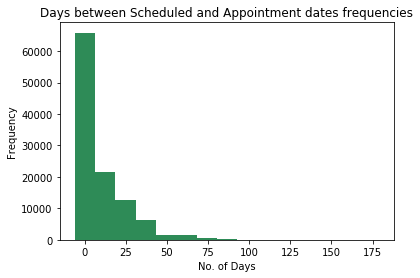

In [26]:
# Histogram for 'Days_BA' Variable and add x-axis label

df['Days_BA'].plot(kind = 'hist', color = 'seagreen', title = 'Days between Scheduled and Appointment dates frequencies', bins = 15);

plt.xlabel("No. of Days")

In [27]:
# Statistics for 'Day_BA' Variable

df['Days_BA'].describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Days_BA, dtype: float64

**Mean of number of days** = 10 days.

**Median of number of days** = 4 days.

**Note :-** **Mean doesn't represent our records correctly**, because the distribution is right-skewed and the median = 4 days. So, **Median is better to represent central tendency of 'Days_BA' column**.

**Min. of number of days** = -6 Days "this means that there are some patients set up their appointments to be before the scheduled day! this is not correct and we should contact our source for more investigation"

**Max. of number of days** = 179 Days = approx. 6 months. "this value should be investigated to ensure that it is correct"

**75% of Records** have 15 Days or less before Appointment day, and **25% of records** have less than 1 day before appointment day.

Th Distribution of Ages is **Right-Skewed**

##### Bar charts for Categorical Data :-

#### 1- Neighborhood :- 

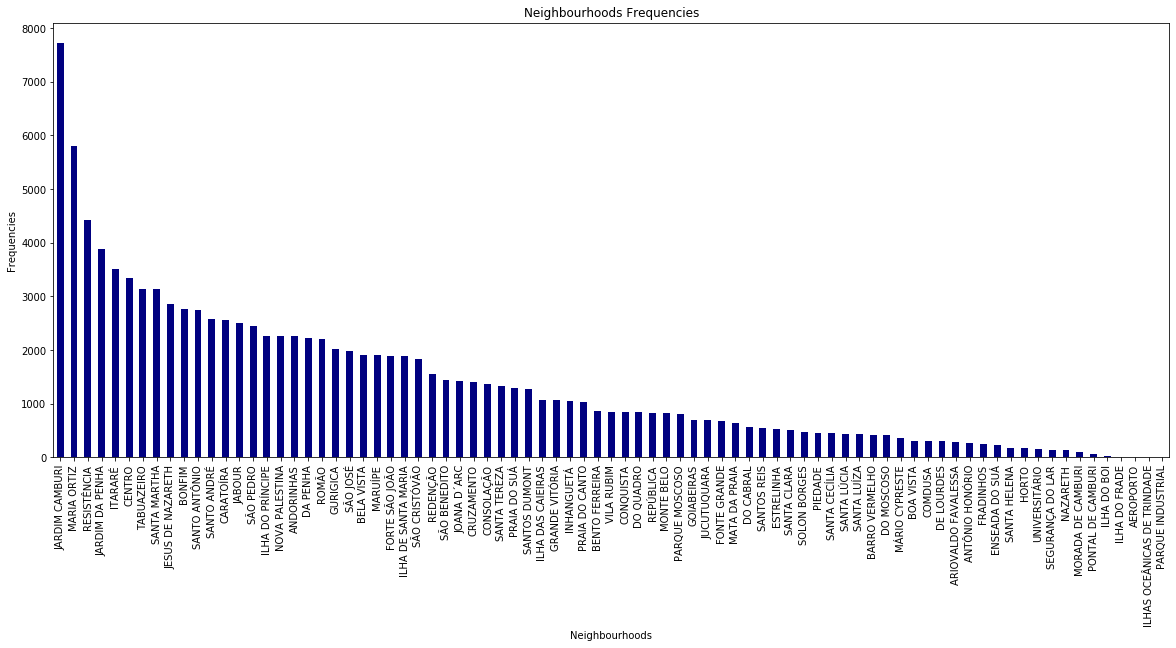

In [28]:
df['Neighbourhood'].value_counts().plot(kind='bar', figsize=(20,8), color = 'navy', title = 'Neighbourhoods Frequencies');

plt.xlabel('Neighbourhoods');
plt.ylabel('Frequencies');

**TOP 5 regions (locations of hospitals) in our data are :-**

1- Jardim Camburi

2- Maria Ortiz

3- Resistencia

4- Jardim Da Penha

5- Itarare

In [29]:
df.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'Days_BA',
       'Has_disease'],
      dtype='object')

#### 2- Genders

Text(0, 0.5, 'Frequency')

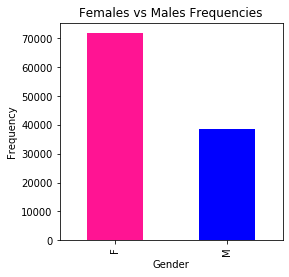

In [30]:
# Bar Chart for 'Gender'
# bar colors (Females 'pink' - males 'blue')
colors = ['deeppink','blue']

df['Gender'].value_counts().plot(kind='bar', figsize=(4,4), title = 'Females vs Males Frequencies', color = colors);

plt.xlabel("Gender")
plt.ylabel("Frequency")

**Females** represent approx. 65% of our Dataset. **Males** represent approx. 35%

#### 3- Scholarships

Text(0, 0.5, 'Frequency')

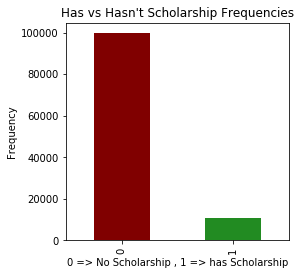

In [31]:
# Bar Chart for 'Scholarships' and axis labels
# bar colors (No scholarship 'maroon' - have scholarships 'forestgreen')
colors = ['maroon','forestgreen']

df['Scholarship'].value_counts().plot(kind='bar', figsize=(4,4), title = "Has vs Hasn't Scholarship Frequencies", color = colors);

plt.xlabel("0 => No Scholarship , 1 => has Scholarship");
plt.ylabel("Frequency")

The Majority of patients in our Dataset **doesn't have a Scholarship**.

#### 4- Hypertension

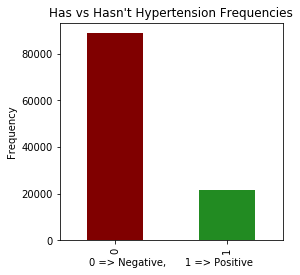

In [32]:
# Bar Chart for 'Hypertension'

# bar colors (No Hypertension 'maroon' - have Hypertension 'forestgreen')
colors = ['maroon','forestgreen']

df['Hipertension'].value_counts().plot(kind='bar', figsize=(4,4), title = "Has vs Hasn't Hypertension Frequencies", color=colors);

plt.xlabel("0 => Negative,      1 => Positive");
plt.ylabel("Frequency");

The Majority of patients in our Dataset **doesn't have Hypertension**.

#### 5- Diabetes

Text(0, 0.5, 'Frequency')

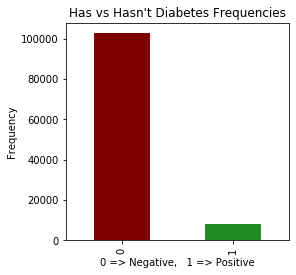

In [33]:
# Bar Chart for 'Diabetes'
# bar colors (No Diabetes 'maroon' - have Diabetes 'forestgreen')
colors = ['maroon','forestgreen']

df['Diabetes'].value_counts().plot(kind='bar', figsize=(4,4), title = "Has vs Hasn't Diabetes Frequencies", color=colors);

plt.xlabel("0 => Negative,   1 => Positive")
plt.ylabel("Frequency")

The Majority of patients in our Dataset **doesn't have Diabetes**.

#### 5- Alcoholism

Text(0, 0.5, 'Frequency')

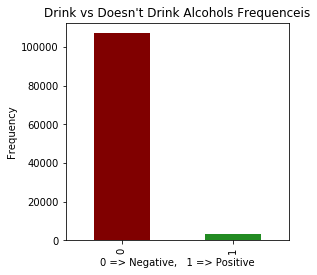

In [34]:
# Bar Chart for 'Alcoholism'
# bar colors (No Alcoholism 'maroon' - have Alcoholism 'forestgreen')
colors = ['maroon','forestgreen']

df['Alcoholism'].value_counts().plot(kind='bar', figsize=(4,4), title = "Drink vs Doesn't Drink Alcohols Frequenceis", color=colors);

plt.xlabel("0 => Negative,   1 => Positive")
plt.ylabel("Frequency")

The Majority of patients in our Dataset **doesn't Drink Alcohols**.

#### 5- SMS_received

Text(0, 0.5, 'Frequency')

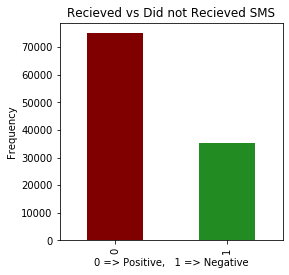

In [35]:
# Bar Chart for 'SMS_received'
# bar colors (No SMS_received 'maroon' - SMS_received 'forestgreen')
colors = ['maroon','forestgreen']

df['SMS_received'].value_counts().plot(kind='bar', figsize=(4,4), title = 'Recieved vs Did not Recieved SMS', color = colors);

plt.xlabel('0 => Positive,   1 => Negative')
plt.ylabel('Frequency')

Approx. **68%** of our Dataset patients **didn't recieved SMS messeges**.

#### 5- No-show

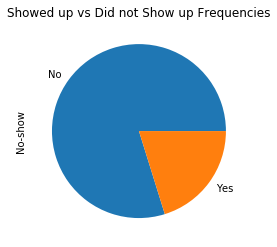

In [36]:
# Bar Chart for 'No-show'

df['No-show'].value_counts().plot(kind='pie', figsize=(4,4), title = 'Showed up vs Did not Show up Frequencies');

In [37]:
# % of patients showed up & not

# number of patients showed Up
n_Showedup = df[df['No-show'] == 'No'].shape[0]

# number of patients didn't showed Up
n_NoShowedUp = df[df['No-show'] == 'Yes'].shape[0]

# Percentage of patients showed Up
perc_showedup = round(n_Showedup / (n_Showedup + n_NoShowedUp) * 100)

# Percentage of patients didn't show Up
perc_no_showedup = round(n_NoShowedUp / (n_Showedup + n_NoShowedUp) * 100)

print("{}% of patients Showed up and {}% of patients didn't show up".format(perc_showedup, perc_no_showedup))

80% of patients Showed up and 20% of patients didn't show up


##### Exploring Relationships between variables.

#### Relationship between 'Gender' and 'No-show' Columns

Text(0, 0.5, 'Frequency')

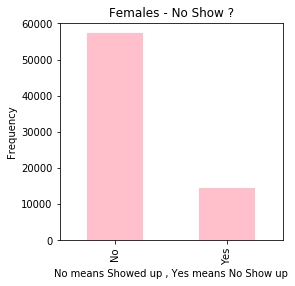

In [38]:
# Plotting Female Patients who showed and didn't Show up
# Creating a dataframe of female patients
df_female = df[df['Gender'] == 'F']

df_female['No-show'].value_counts().plot(kind='bar', figsize=(4,4), title='Females - No Show ?', color = 'pink');

plt.xlabel('No means Showed up , Yes means No Show up')
plt.ylabel('Frequency')

In [39]:
# % of Female patients showed up & not

# number of Female patients showed Up
n_Showedup = df_female[df['No-show'] == 'No'].shape[0]

# number of Female patients didn't showed Up
n_NoShowedUp = df_female[df['No-show'] == 'Yes'].shape[0]

# Percentage of Female patients showed Up
perc_showedup = round(n_Showedup / (n_Showedup + n_NoShowedUp) * 100)

# Percentage of Female patients didn't show Up
perc_no_showedup = round(n_NoShowedUp / (n_Showedup + n_NoShowedUp) * 100)

print("{}% of Female patients Showed up and {}% of Female patients didn't show up".format(perc_showedup, perc_no_showedup))

80% of Female patients Showed up and 20% of Female patients didn't show up


D:\PROGRAMS INSTALLED\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
D:\PROGRAMS INSTALLED\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Text(0, 0.5, 'Frequency')

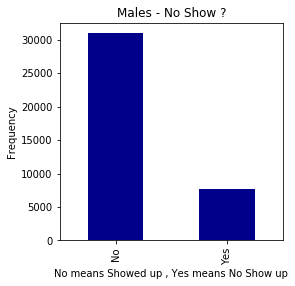

In [40]:
# Plotting Male Patients who showed and didn't Show up
# Creating a dataframe of Male patients
df_male = df[df['Gender'] == 'M']

df_male['No-show'].value_counts().plot(kind='bar', figsize=(4,4), title='Males - No Show ?', color = 'darkblue');

plt.xlabel('No means Showed up , Yes means No Show up')
plt.ylabel('Frequency')

In [41]:
# % of Male patients showed up & not

# number of Male patients showed Up
n_Showedup = df_male[df['No-show'] == 'No'].shape[0]

# number of Male patients didn't showed Up
n_NoShowedUp = df_male[df['No-show'] == 'Yes'].shape[0]

# Percentage of Female patients showed Up
perc_showedup = round(n_Showedup / (n_Showedup + n_NoShowedUp) * 100)

# Percentage of Female patients didn't show Up
perc_no_showedup = round(n_NoShowedUp / (n_Showedup + n_NoShowedUp) * 100)

print("{}% of Male patients Showed up and {}% of Male patients didn't show up".format(perc_showedup, perc_no_showedup))

80% of Male patients Showed up and 20% of Male patients didn't show up


D:\PROGRAMS INSTALLED\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
D:\PROGRAMS INSTALLED\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


There is **No Relationship** between **'Gender' and 'No-Show'**

___________________________________________________________________________________________

#### Relationship between 'Neighborhoods' and 'No-show' Columns

Text(0, 0.5, 'Frequency')

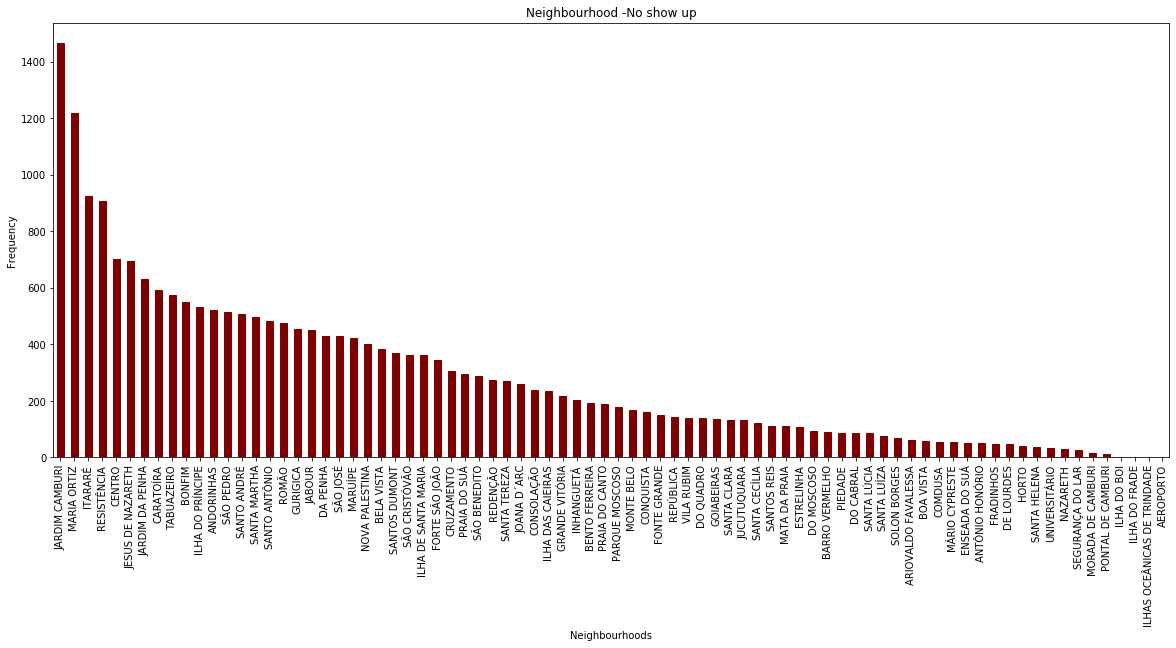

In [42]:
# Plotting Jardim Camburi Patients who showed and didn't Show up

df[df['No-show'] == 'Yes']['Neighbourhood'].value_counts().plot(kind='bar', figsize=(20,8), title='Neighbourhood -No show up', Color = 'maroon');

plt.xlabel('Neighbourhoods')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

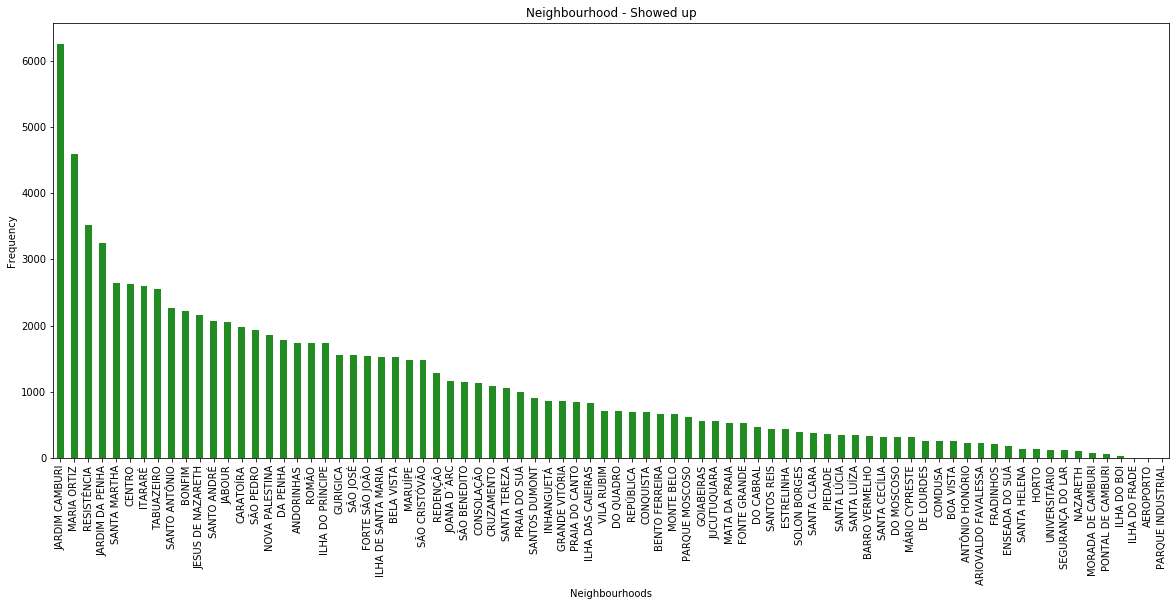

In [43]:
# Plotting Jardim Camburi Patients who showed and didn't Show up

df[df['No-show'] == 'No']['Neighbourhood'].value_counts().plot(kind='bar', figsize=(20,8), title='Neighbourhood - Showed up', color = 'forestgreen');

plt.xlabel('Neighbourhoods')
plt.ylabel('Frequency')

The Top 5 Regions in patients that showed up and that didn't show up are **not the same**, this may indicate that **No-Show** variable is slightly affected by **Neighbourhood**. but we can't be so confident because the **No. of records for each Neighbourhood** is not the same.

----------------------------------------------------------------------------------------------------------------------------

#### Relationship between 'Age' and 'No-show' Columns

Text(0, 0.5, 'Frequency')

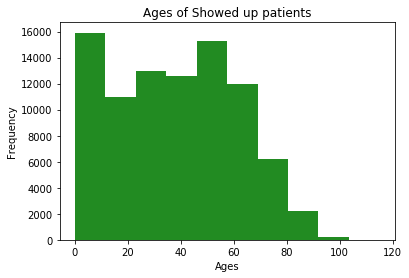

In [44]:
# Plotting Histogram of Ages for Patients who showed up

df[df['No-show'] == 'No']['Age'].plot(kind = 'hist', title = 'Ages of Showed up patients', color = 'forestgreen');

plt.xlabel('Ages')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

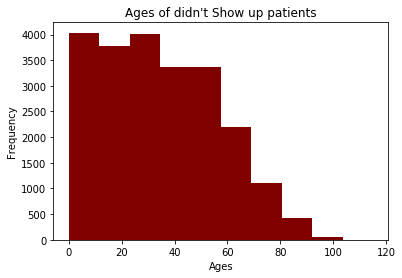

In [45]:
# Plotting Histogram of Ages for Patients who didn't show up

df[df['No-show'] == 'Yes']['Age'].plot(kind = 'hist', title = 'Ages of didn\'t Show up patients', color = 'maroon');

plt.xlabel('Ages')
plt.ylabel('Frequency')

From these 2 Charts, we see that **Older Patients are more likely to show up than younger patients**

----------------------------------------------------------------------------------------------------------------------------

#### Relationship between 'Days_BA' and 'No-show' Variables

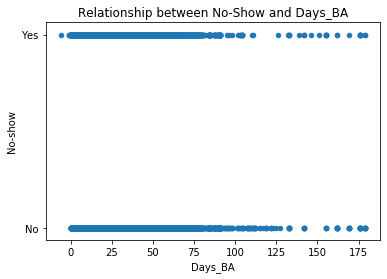

In [46]:
# Plotting 'Days_BA' and 'No-show' variables using scatter plot

df.plot(x='Days_BA', y='No-show', kind = 'scatter', title = 'Relationship between No-Show and Days_BA');

There is **no clear relationship** between "number of days between sheduled day and appointment day" and "showing up or not"

------------------------------------------------------------------------------------------------------------------

#### Relationship between 'Scholarship' and 'No-show' Variables

Text(0, 0.5, 'Frequency')

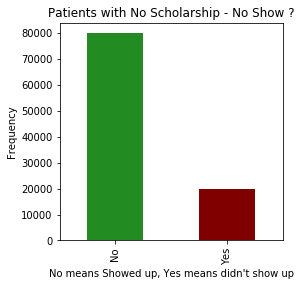

In [47]:
# Create df for patients who don't have scholarship
df_no_scholarship = df[df['Scholarship'] == 0]

# bar colors (Green for Showed up - Red for No show up)
colors = ['forestgreen','maroon']

df_no_scholarship['No-show'].value_counts().plot(kind='bar', figsize=(4,4), title='Patients with No Scholarship - No Show ?', color=colors);

plt.xlabel('No means Showed up, Yes means didn\'t show up')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

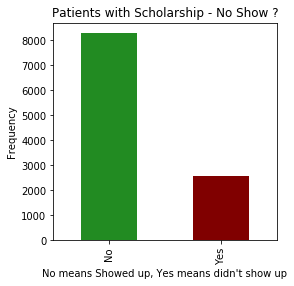

In [48]:
# Create df for patients who don't have scholarship
df_scholarship = df[df['Scholarship'] == 1]

# bar colors (Green for Showed up - Red for No show up)
colors = ['forestgreen','maroon']

df_scholarship['No-show'].value_counts().plot(kind='bar', figsize=(4,4), title='Patients with Scholarship - No Show ?', color= colors);

plt.xlabel('No means Showed up, Yes means didn\'t show up')
plt.ylabel('Frequency')

There is **no clear relationship** between "number of days between sheduled day and appointment day" and "showing up or not"

------------------------------------------------------------------------------------------------------------------

#### Relationship between 'Has_disease' and 'No-show'

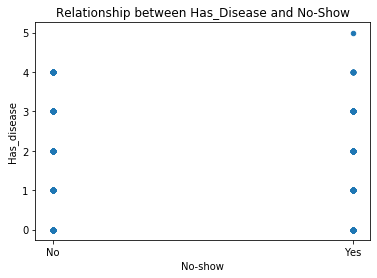

In [49]:
# Plotting 'Has_disease' and 'No-show' variables using scatter plot

df.plot(x='No-show', y='Has_disease', kind = 'scatter', title = 'Relationship between Has_Disease and No-Show');

In [50]:
# Create df for patients with disease(s) / 'Has_disease' > 0
df_has_disease = df[df['Has_disease'] > 0]

# Create df for patients with no disease(s) / 'Has_disease' = 0
df_has_no_disease = df[df['Has_disease'] == 0]


In [51]:
# % of patients with Diseases that showed up & not

# number of patients with Diseases showed Up
n_Showedup = df_has_disease[df['No-show'] == 'No'].shape[0]

# number of patients with Diseases didn't showed Up
n_NoShowedUp = df_has_disease[df['No-show'] == 'Yes'].shape[0]

# Percentage of patients with Diseases showed Up
perc_showedup = round(n_Showedup / (n_Showedup + n_NoShowedUp) * 100)

# Percentage of patients with Diseases didn't show Up
perc_no_showedup = round(n_NoShowedUp / (n_Showedup + n_NoShowedUp) * 100)

print("{}% of patients with Diseases Showed up and {}% of patients with Diseases didn't show up".format(perc_showedup, perc_no_showedup))

82% of patients with Diseases Showed up and 18% of patients with Diseases didn't show up


D:\PROGRAMS INSTALLED\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
D:\PROGRAMS INSTALLED\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [52]:
# % of patients with no Diseases that showed up & not

# number of patients with no Diseases showed Up
n_Showedup = df_has_no_disease[df['No-show'] == 'No'].shape[0]

# number of patients with no Diseases didn't showed Up
n_NoShowedUp = df_has_no_disease[df['No-show'] == 'Yes'].shape[0]

# Percentage of patients with no Diseases showed Up
perc_showedup = round(n_Showedup / (n_Showedup + n_NoShowedUp) * 100)

# Percentage of patients with no Diseases didn't show Up
perc_no_showedup = round(n_NoShowedUp / (n_Showedup + n_NoShowedUp) * 100)

print("{}% of patients with Diseases Showed up and {}% of patients with Diseases didn't show up".format(perc_showedup, perc_no_showedup))

79% of patients with Diseases Showed up and 21% of patients with Diseases didn't show up


D:\PROGRAMS INSTALLED\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
D:\PROGRAMS INSTALLED\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


**Patients having a disease are more likely to show up than patients with no diseases.**

--------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------

# Conclusion

### Variables affecting patients showing up at their appointments :-
-  **Older Patients** are more likely to show up at their appointments than **Younger Patients**.

-  **Patients with Illness** are more likely to show up at their appointments than **Healthy Patients**.

-  **Neighbourhoods of Hospitals** may have an impact on patients showing or not showing up.

### Limitations of Data :-

- **Data size is NOT ENOUGH :-** Although **Ages** and **Health status** of patients seem to have impact on showing or not showing up, their impacts seems to be not critical. we don't have enough data to see if their impacts are significant or not.


- **Variables is NOT CRITICAL :-** Not all available variables are significant. There are other variables that may have more significant effect on showing up at appointments like :-
    - **Distance** and **Time** between patient's address and hospital.
    - **Transportation** available for the patient.
    - **Appointment Day Weather**.
    - **Patient's Educational Background**.
    - **Reason of Appointment**, why the patient set up an appointment ?.
    
    
- **Many Outliers :-** There are many outliers in the dataset. These outliers need to be investigated to ensure its correctness.